# Mental Attention States Classification Using EEG Data

### Pattern Recognition - Mid-term project - Group 3

| **Full name**          | **Student ID** |
|------------------------|----------------|
| Lê Hồng Cát            |  21110249      |       
| Trương Minh Hoàng      |  22280034      |
| Đặng Minh Phúc         |  22280064      |
| Trần Nguyễn Trung Tuấn |  22280101      |


# Outline
- [ 1 - Objective ](#1)
- [ 2 - Data Preprocessing ](#2)
- [ 3 - Feature Engineering ](#3)
- [ 4 - Model Development ](#4)
- [ 5 - Analysis and Visualization ](#5)
- [ 6 - Report ](#6)
- [ 7 - Self-Assessment ](#7)

<a name="1"></a>
## 1. Objective

 Classify mental attention states (focused, unfocused, drowsy) based on EEG signals using
 machine learning techniques.

__Dataset Details:__
 - Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/data
 - Data was acquired from EMOTIV EEG devices during 34 experiments.
 - EEG data is in channels 4 to 17 of the provided Matlab files.
 - Sampling frequency: 128 Hz.

<a name="2"></a>
## 2. Data Preprocessing

### Read data

In [1]:
import mne
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path = 'EEG Data/eeg_record1.mat'

# Load the .mat file
mat_data = loadmat(path)

# Inspect the content of the .mat file
print(mat_data.keys())  # Lists the variables stored in the .mat file

dict_keys(['__header__', '__version__', '__globals__', 'o'])


In [2]:
eeg_data = mat_data['o']
type(eeg_data)

numpy.ndarray

In [3]:
eeg_data[0][0]['data']

array([[  3.,   0., 463., ...,   0.,   0.,   0.],
       [  4.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   0., 447., ...,   0.,   0.,   0.],
       ...,
       [ 25.,   0.,   0., ...,   0.,   0.,   0.],
       [ 26.,   0.,   0., ...,   0.,   0.,   0.],
       [ 27.,   0.,   0., ...,   0.,   0.,   0.]])

In [4]:
data = eeg_data[0][0]['data']
data.shape

(308868, 25)

In [5]:
# The EEG data is in the channels 4 to 17 (columns index 3:17)
data = data[:, 3:17]
data = data.T
data.shape

(14, 308868)

In [6]:
channels = [
    'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
    'O2',  'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4',    
]

sampling_freq = 128

info = mne.create_info(channels, sampling_freq, ch_types='eeg')
raw_data = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.


In [7]:
raw_data.info

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>

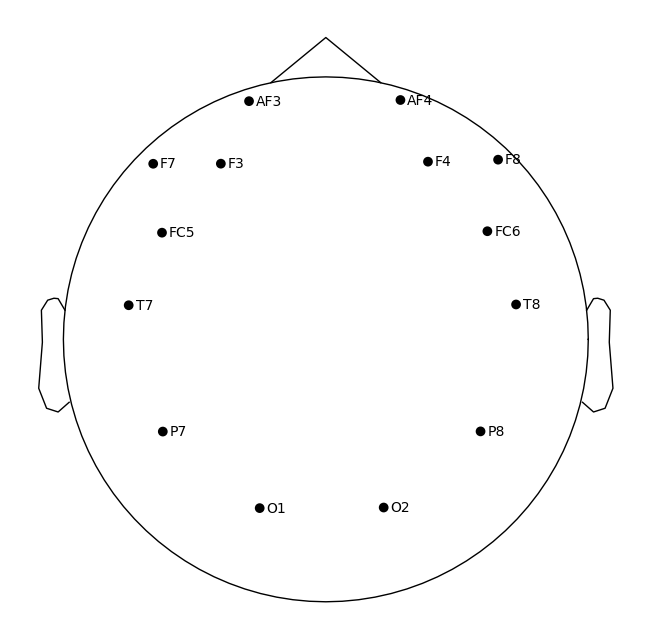

In [8]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_data.set_montage(montage)

raw_data.plot_sensors(show_names=True)
plt.show()

Using matplotlib as 2D backend.


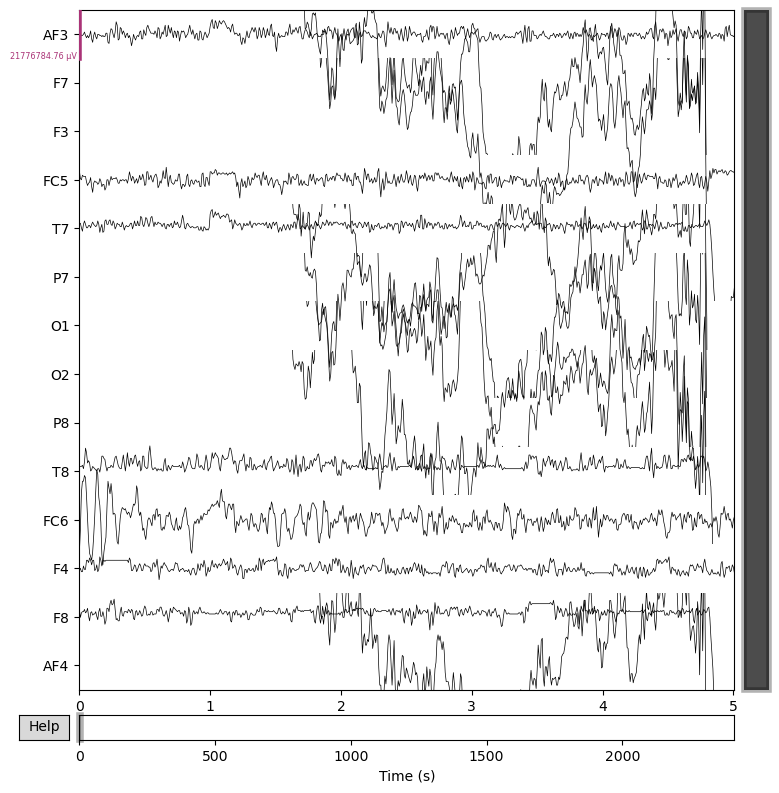

In [9]:
raw_data.plot(scalings='auto', duration=5, n_channels=14)
plt.show()

### Band-pass filtering

In [10]:
# Band-pass filter: between 1 Hz and 50 Hz
raw_data.filter(1, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


<RawArray | 14 x 308868 (2413.0 s), ~33.0 MB, data loaded>

In addition, a notch filter was used to 
remove line noise at 50 Hz

In [11]:
# Notch filter to remove line noise at 50 Hz
raw_data.notch_filter(freqs=50, picks='eeg')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


<RawArray | 14 x 308868 (2413.0 s), ~33.0 MB, data loaded>

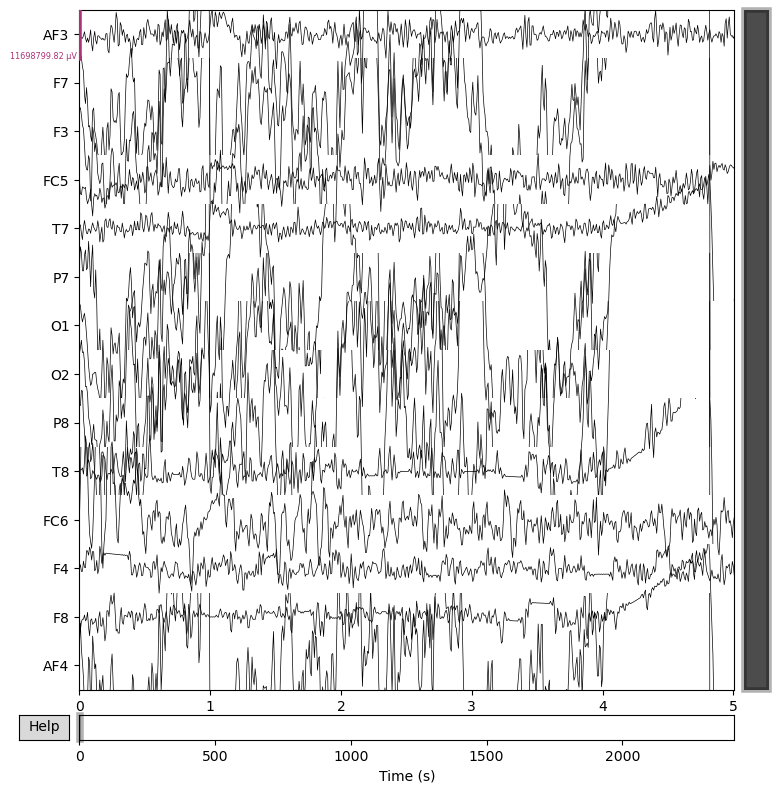

In [12]:
raw_data.plot(scalings='auto', duration=5, n_channels=14)
plt.show()

### Remove artifacts with ICA

In [13]:
# Baseline correction: using the first 1000 ms (1 second) as baseline (adjust if necessary)
# raw_data.apply_baseline(baseline=(None, None))

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 2.2s.


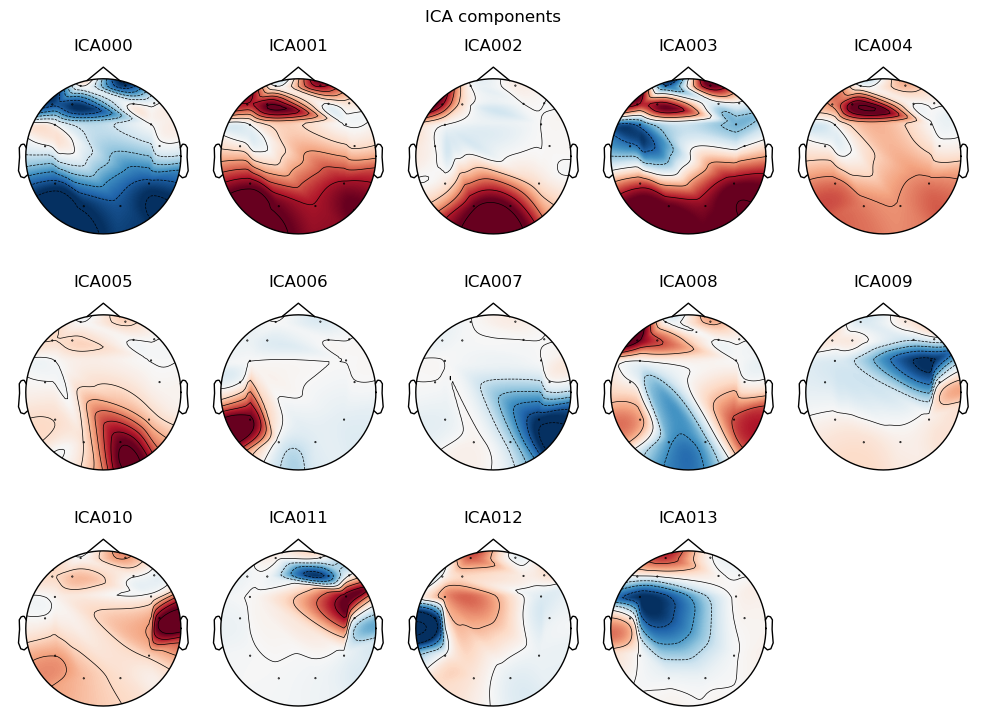

In [14]:
from mne.preprocessing import ICA
import matplotlib.pyplot as plt

# Fit ICA to the raw data
ica = ICA(n_components=14, random_state=42)
ica.fit(raw_data)

ica.plot_components()
plt.show()

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.


libGL error: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: radeonsi
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


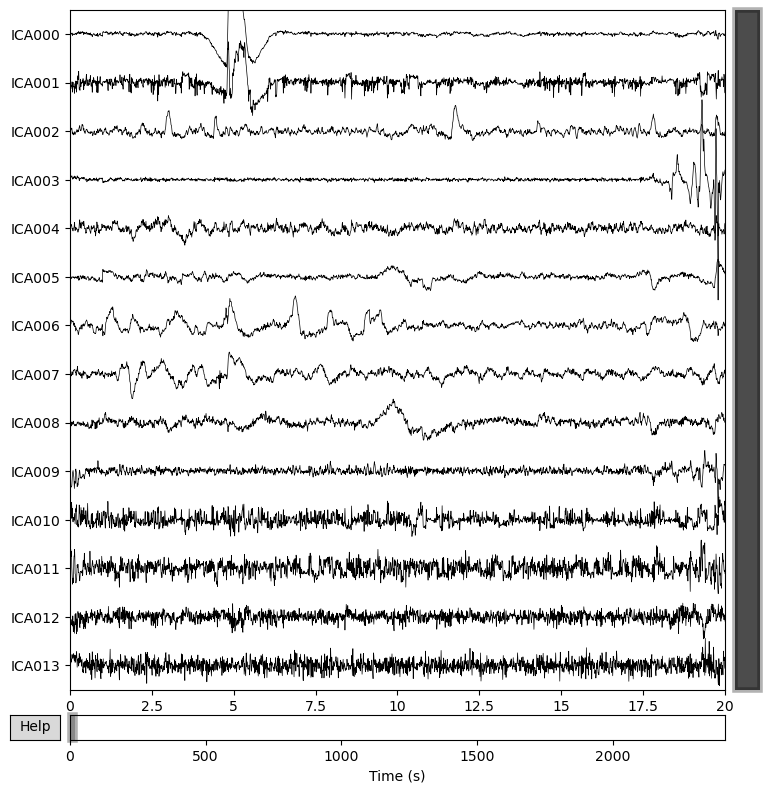

In [15]:
%matplotlib qt
ica.plot_sources(raw_data, use_opengl=True, overview_mode=True)

In [16]:
ica.exclude = []

In [17]:
data = ica.apply(raw_data, exclude=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


In [18]:
data

<RawArray | 14 x 308868 (2413.0 s), ~33.0 MB, data loaded>

In [19]:
data.plot(scalings='auto', duration=5, n_channels=14)
plt.show()

### Epoch data

In [20]:
# Define events with 1-s epochs
events = mne.make_fixed_length_events(data, id=1, duration=1.0)

In [21]:
epochs = mne.Epochs(data, events, baseline=(None,0), preload=True)

Not setting metadata
2413 matching events found
Setting baseline interval to [-0.203125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2413 events and 91 original time points ...
1 bad epochs dropped


#### Get labels 

In [22]:
def get_labels():
    # Define the time intervals for the different states (in seconds)
    focused_end = 10 * 60  # 10 minutes in seconds
    unfocused_end = 20 * 60  # 20 minutes in seconds
    
    labels = []
    
    for event in events[:, 0]:  # Loop through event times (event[0] is the sample index)
        event_time = event / 128  # Convert the event sample index to time in seconds
    
        if event_time < focused_end:
            labels.append('focused')
        elif event_time < unfocused_end:
            labels.append('unfocused')
        else:
            labels.append('drowsy')
    return np.array(labels)

epochs.info['temp'] = get_labels()

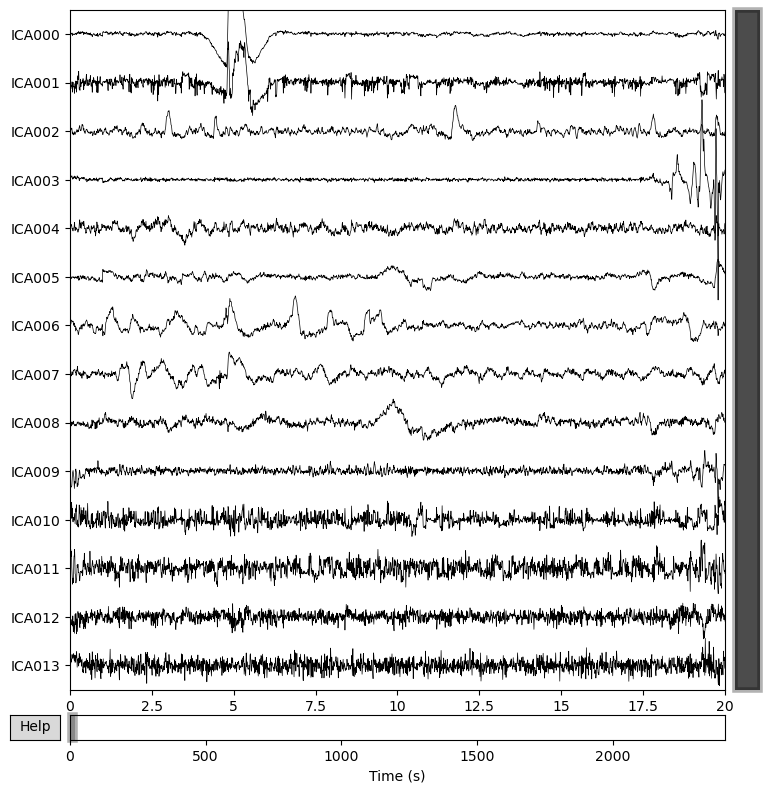

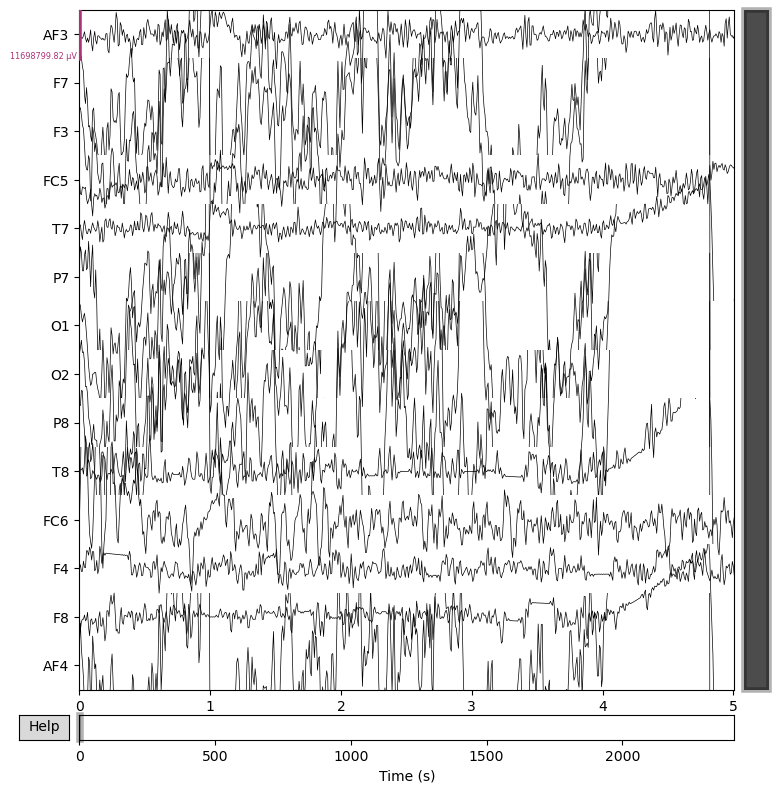

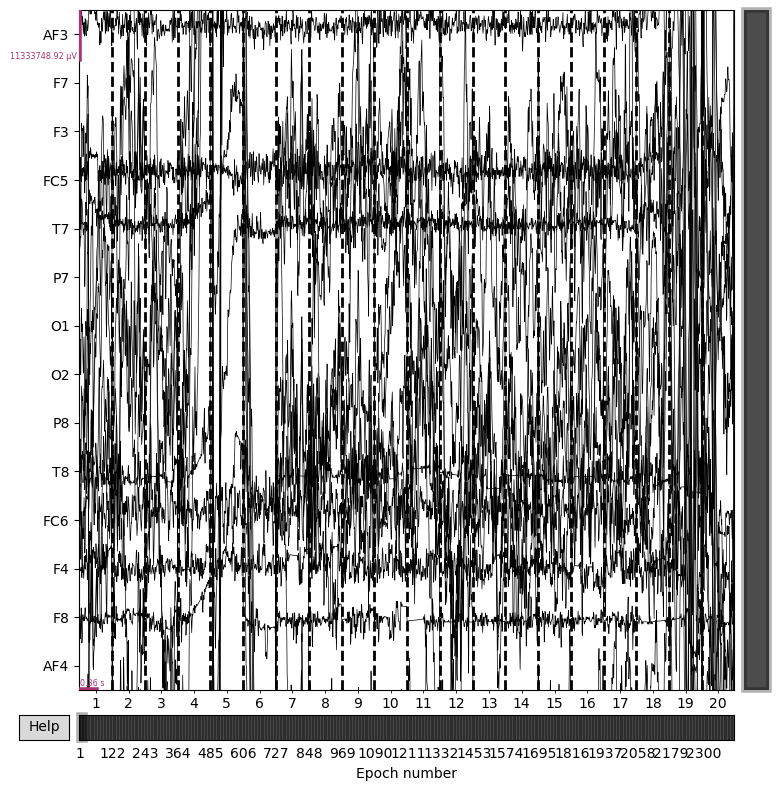

Channels marked as bad:
none


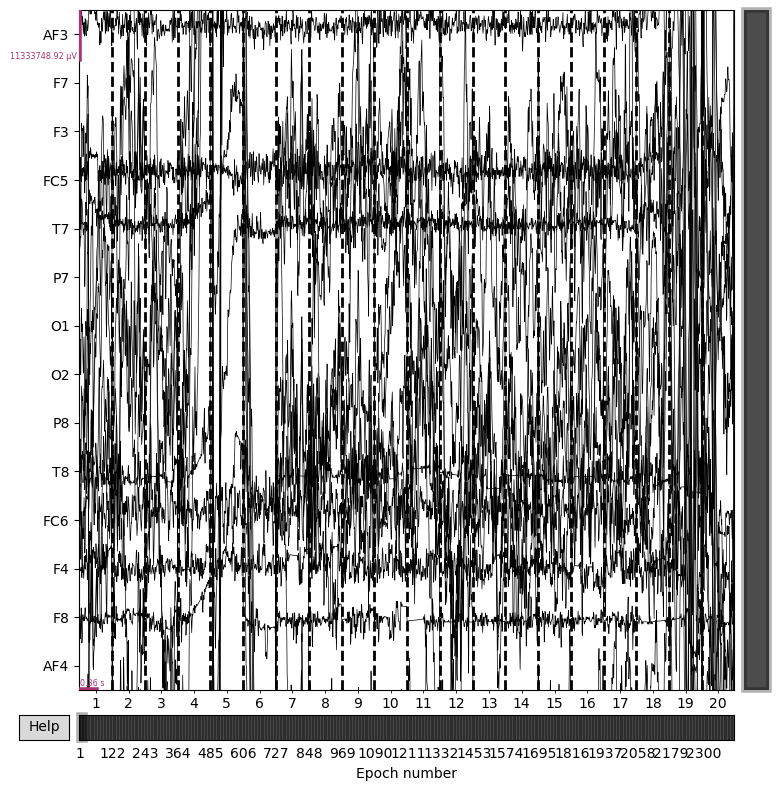

In [23]:
%matplotlib inline
epochs.plot(scalings='auto')

#### Apply ICA to remove artifacts

In [24]:
# Need to apply ICA for epochs
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


/tmp/ipykernel_5936/2294273460.py:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [25]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
 temp: 2413 items (ndarray)
>

#### Reject abnormal epochs

In [26]:
# Reject epochs with an amplitude larger than ±100 μV
# reject_criteria = dict(eeg=100)
# epochs.drop_bad(reject=reject_criteria)

In [27]:
len(epochs)

2412

After reject epochs with an amplitude larger than ±100 μV, the len of epochs decrease from 2413 to 1836. 

In [28]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
 temp: 2413 items (ndarray)
>

In [29]:
epochs.get_data().shape

(2412, 14, 91)

### Power spectrum analysis

In [30]:
spectrum = epochs.compute_psd(method='multitaper')
psd, freqs = spectrum.get_data(return_freqs=True)

    Using multitaper spectrum estimation with 7 DPSS windows


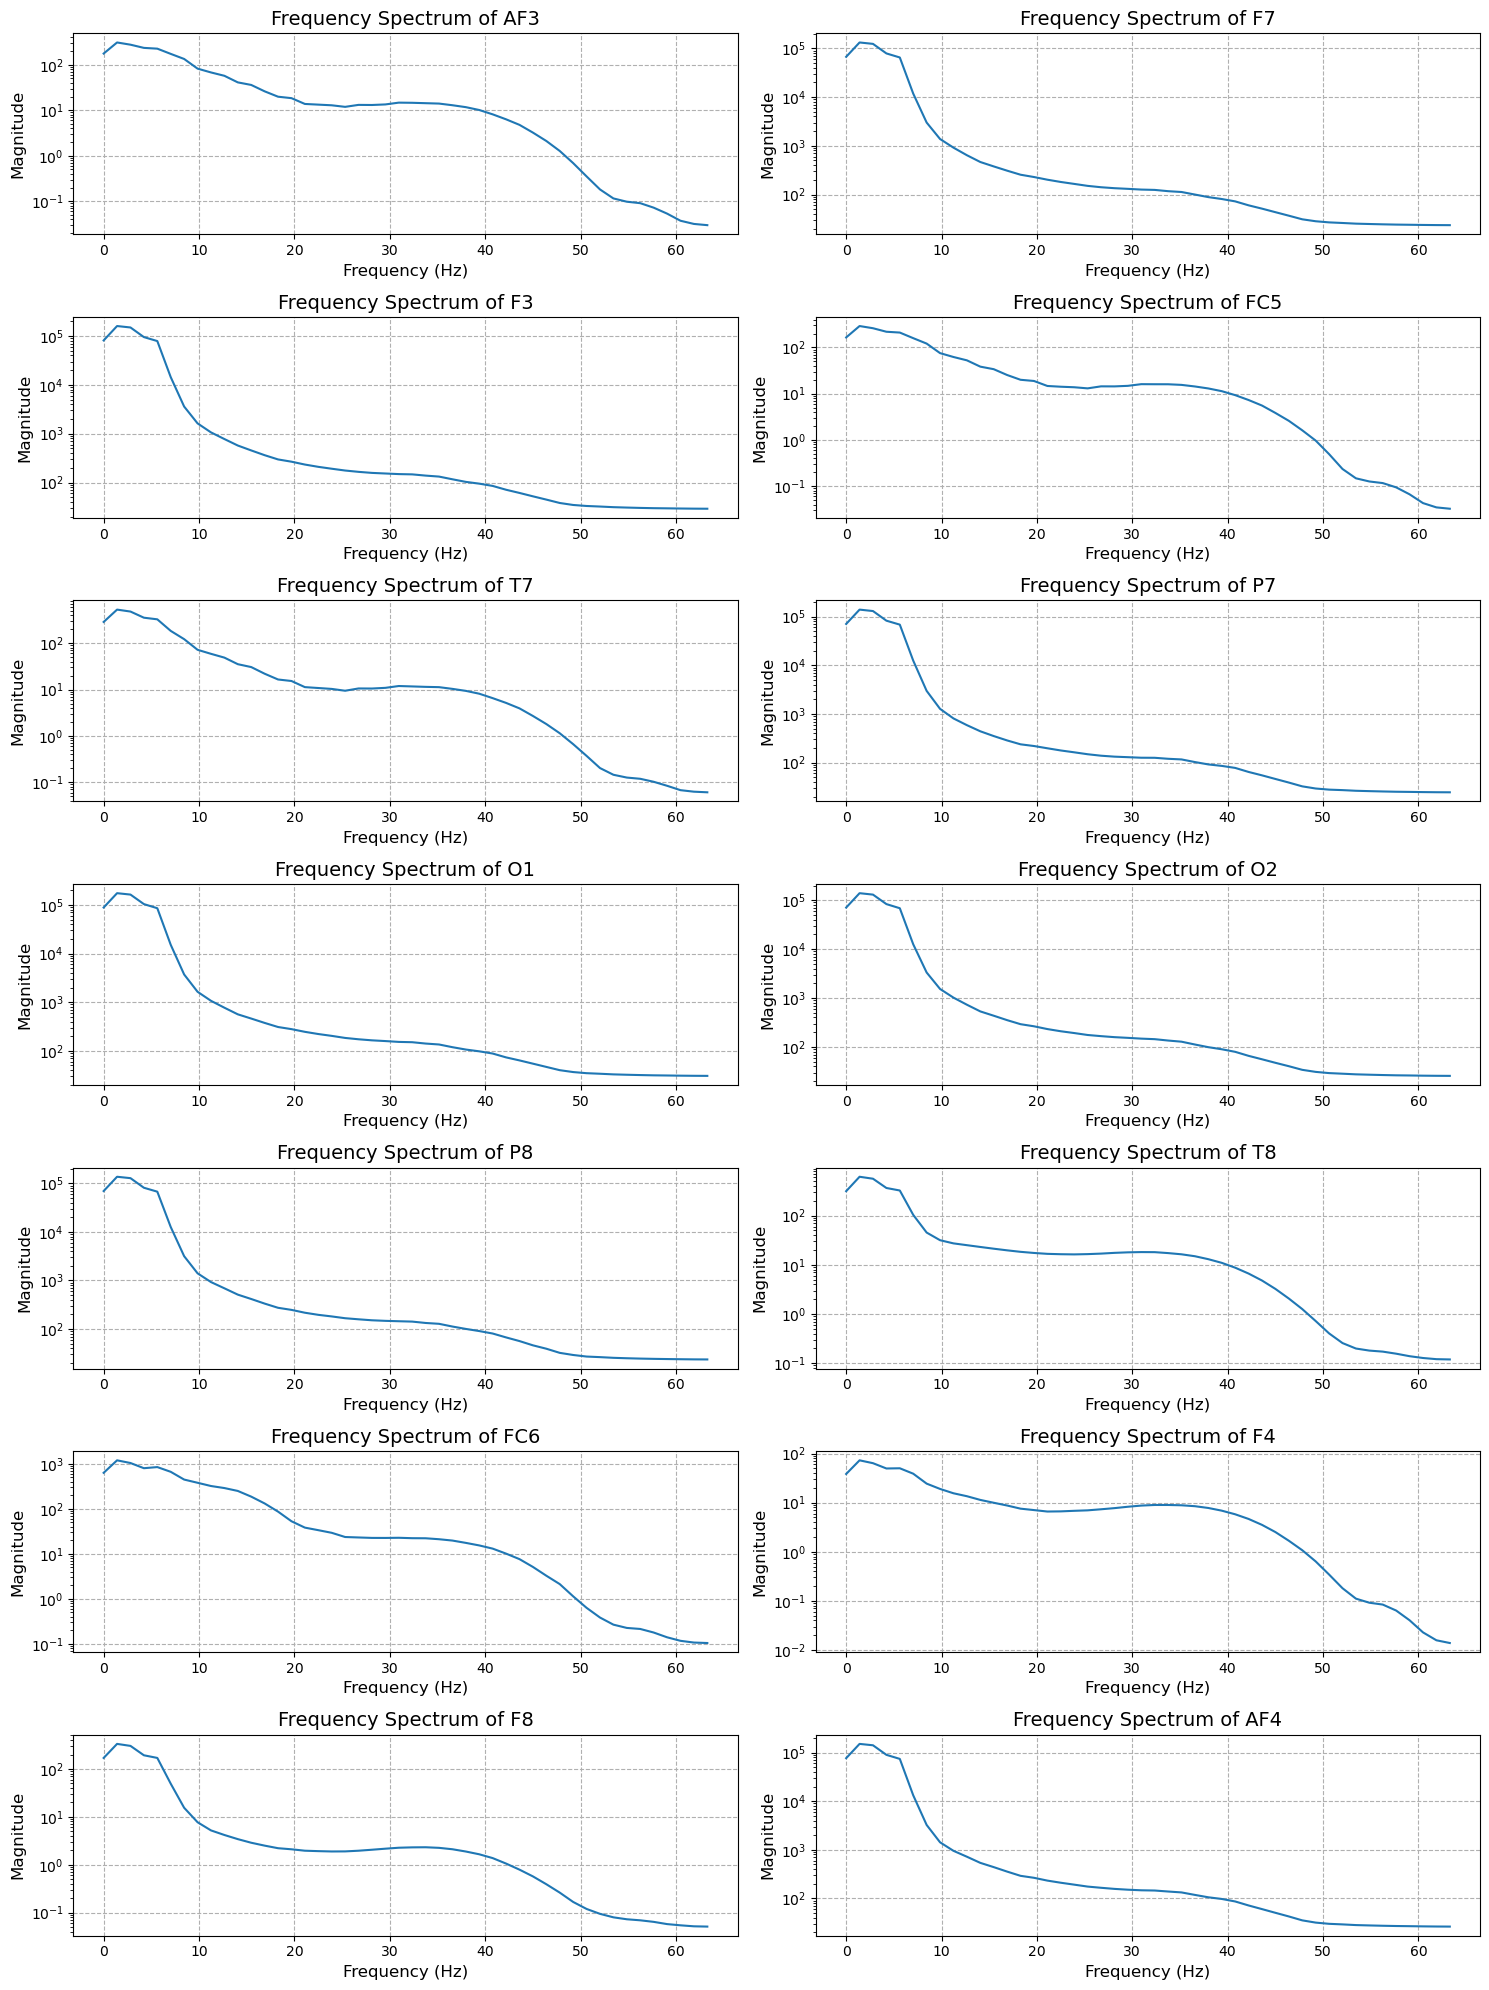

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))
# Loop through each channel and plot its PSD in a separate subplot
for ch_idx, channel in enumerate(epochs.info['ch_names']):
    plt.subplot(7, 2, ch_idx + 1)

    plt.semilogy(freqs, psd[:, ch_idx].mean(axis=0))
    plt.title(f'Frequency Spectrum of {channel}', fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

In [32]:
# Get current labels (being changed after drop_bad)
labels = epochs.info['temp'][epochs.selection]

# Convert the numpy array to a pandas Series and use value_counts()
value_counts = pd.Series(labels).value_counts()
value_counts

drowsy       1213
unfocused     600
focused       599
Name: count, dtype: int64

In [33]:
import pandas as pd
import numpy as np

# Assuming 'psd' has shape (n_epochs, n_channels, n_freqs)
# and 'freqs' is a 1D array of frequencies corresponding to the psd

# Define frequency band limits (in Hz)
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (13, 35),
    'gamma': (35, 50)
}

# Function to get the band power for each frequency band
def get_band_power(psd, freqs, band):
    band_start, band_end = band
    freq_mask = (freqs >= band_start) & (freqs <= band_end)
    band_psd = psd[:, :, freq_mask]  # Shape will be (n_epochs, n_channels, band_freqs)
    band_power = band_psd.mean(axis=2)  # Averaging across the frequencies in the band
    return band_power

def get_final_df(psd, freqs, bands):
    labels = epochs.info['temp'][epochs.selection]
    
    # Get band powers (average over all epochs for each channel)
    delta_power = get_band_power(psd, freqs, bands['delta'])  # Shape (n_epochs, n_channels)
    theta_power = get_band_power(psd, freqs, bands['theta'])
    alpha_power = get_band_power(psd, freqs, bands['alpha'])
    beta_power = get_band_power(psd, freqs, bands['beta'])
    gamma_power = get_band_power(psd, freqs, bands['gamma'])
    
    # We want to create a dataframe with 42 rows: 14 channels * 3 labels (Focused, Unfocused, Drowsy)
    # Create an empty list to hold the data for the DataFrame
    data = []
    
    # Iterate over the 3 labels
    for label in ['focused', 'unfocused', 'drowsy']:
        # Create a mask for each label (target)
        label_mask = np.array(labels) == label
        
        # For each channel, get the average power for the epochs corresponding to the label
        for ch_idx in range(len(epochs.info['ch_names'])):
            # Select the epochs corresponding to the label for this channel and compute the mean
            delta = delta_power[label_mask, ch_idx].mean()
            theta = theta_power[label_mask, ch_idx].mean()
            alpha = alpha_power[label_mask, ch_idx].mean()
            beta = beta_power[label_mask, ch_idx].mean()
            gamma = gamma_power[label_mask, ch_idx].mean()
    
            # Append the result for this channel and label
            data.append([delta, theta, alpha, beta, gamma, 
                         epochs.info['ch_names'][ch_idx], label])

    df = pd.DataFrame(data, columns=['delta', 'theta', 'alpha', 'beta', 'gamma', 'channel', 'state'])
    return df

# Convert the data to a DataFrame
# df = pd.DataFrame(data, columns=['delta', 'theta', 'alpha', 'beta', 'gamma', 'channel', 'state'])
df = get_final_df(psd, freqs, bands)
df

,delta,theta,alpha,beta,gamma,channel,state
0,1091.857986,783.759772,341.420415,48.291324,12.309841,AF3,focused
1,136400.070619,56545.189988,2759.389246,286.983250,79.009315,F7,focused
2,158637.854123,66325.850662,3504.995607,352.707976,94.198053,F3,focused
3,1007.744603,709.108100,299.426408,43.433098,11.235139,FC5,focused
4,1301.209756,831.681041,299.435698,41.298360,9.669105,T7,focused
5,132773.459380,55010.454931,2550.359931,255.201605,76.229027,P7,focused
6,175982.696784,72960.458937,3487.788195,363.838536,97.745192,O1,focused
7,146148.700997,60956.856820,3187.504356,345.203891,91.190897,O2,focused
8,136266.249661,56781.543074,3006.388490,319.008215,84.428895,P8,focused
9,446.239684,222.047660,39.655297,16.712995,6.654524,T8,focused


<a name="4"></a>
## 4. Model Development

In [69]:
import mne
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_list = [] # List to store each DataFrame

for i in range(1, 35):
    # Load the .mat file
    mat_data = loadmat(f'EEG Data/eeg_record{i}.mat')

    eeg_data = mat_data['o']

    data = eeg_data[0][0]['data']
    data = data[:, 3:17]
    data = data.T
    
    channels = [
        'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
        'O2',  'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4',    
    ]
    
    sampling_freq = 128
    
    info = mne.create_info(channels, sampling_freq, ch_types='eeg')
    raw_data = mne.io.RawArray(data, info)
    
    # Band-pass filter: between 1 Hz and 50 Hz
    raw_data.filter(1, 50)
    
    # Notch filter to remove line noise at 50 Hz
    raw_data.notch_filter(freqs=50, picks='eeg')
    
    # Fit ICA to the raw data
    ica = ICA(n_components=14, random_state=42)
    ica.fit(raw_data)
    
    ica.exclude = []
    data = ica.apply(raw_data, exclude=ica.exclude)
    
    # Define events with 1-s epochs
    events = mne.make_fixed_length_events(data, id=1, duration=1.0)
    epochs = mne.Epochs(data, events, baseline=(None,0), preload=True)
    
    epochs.info['temp'] = get_labels()
    
    # Need to apply ICA for epochs
    epochs = ica.apply(epochs, exclude=ica.exclude)
    
    spectrum = epochs.compute_psd(method='multitaper')
    psd, freqs = spectrum.get_data(return_freqs=True)
    
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 12),
        'beta': (13, 35),
        'gamma': (35, 64)
    }
    
    df = get_final_df(psd, freqs, bands)
    df_list.append(df)

# Concatenate all DataFrames into one
final_data = pd.concat(df_list, ignore_index=True)

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband atte

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Selecting by number: 14 components
Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata
2413 matching events found
Setting baseline interval to [-0.203125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2413 events and 91 original time points ...
1 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
    Using multitaper spectrum estimation with 7 DPSS windows


/tmp/ipykernel_5936/112532072.py:49: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


KeyboardInterrupt: 

In [75]:
#final_data.to_csv('mne_full.csv')

In [71]:
final_data['state'].value_counts()

state
1    476
2    476
0    476
Name: count, dtype: int64

In [72]:
final_data.describe()

,delta,theta,alpha,beta,gamma,channel,state
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,5387.452379,2597.427799,557.586861,101.602628,15.611057,6.500000,1.000000
std,24429.954709,10833.092506,2141.396972,295.105297,81.411593,4.032541,0.816783
min,0.437925,0.285716,0.098448,0.029127,0.004236,0.000000,0.000000
25%,25.734656,21.306873,13.569150,8.752149,2.551908,3.000000,0.000000
50%,605.956433,414.280638,186.561013,48.953890,6.816882,6.500000,1.000000
75%,2469.840844,1552.937499,582.366709,116.095306,11.629361,10.000000,2.000000
max,469303.500954,192507.404244,70998.400150,8230.618027,2131.097018,13.000000,2.000000


In [ ]:
final_data['combine_6'] = final_data['alpha'] / (final_data['delta'] + final_data['theta'] + final_data['alpha'])
final_data['combine_7'] = (final_data['theta'] + final_data['beta']) / (final_data['alpha'] + final_data['gamma'])
final_data['combine_8'] = (final_data['alpha'] + final_data['beta']) / (final_data['delta'] + final_data['theta'] + final_data['gamma'])
final_data['combine_9'] = final_data['beta'] / final_data['delta']
final_data['combine_10'] = final_data['theta'] / final_data['beta']
final_data['combine_11'] = final_data['beta'] / (final_data['theta'] + final_data['alpha'])
final_data['combine_12'] = final_data['alpha'] / final_data['beta']
final_data['combine_13'] = final_data['beta'] / final_data['theta']
final_data['combine_14'] = final_data['alpha'] / (final_data['beta'] + final_data['gamma'])
final_data['combine_15'] = (final_data['alpha'] + final_data['beta']) / final_data['gamma']
final_data['combine_16'] = final_data['beta'] / final_data['alpha']
final_data['combine_17'] = (final_data['alpha'] + final_data['beta']) / (final_data['alpha'] + final_data['theta'])

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
final_data['channel'] = encoder.fit_transform(final_data['channel'])
final_data['state'] = encoder.fit_transform(final_data['state'])
df.head()

,delta,theta,alpha,beta,gamma,channel,state
0,120.450124,92.726487,53.000261,13.919313,3.054563,0,1
1,1027.430890,957.860207,746.200820,102.822357,6.795732,4,1
2,9648.938363,4770.819574,1240.497368,165.747066,12.890249,2,1
3,23.049518,17.365642,11.053908,7.967164,2.546846,6,1
4,9.444781,9.482841,9.153770,8.718776,2.731852,12,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = final_data.drop(columns=['state'])
y = final_data['state']

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa các biến đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
%matplotlib inline
from sklearn.metrics import accuracy_score, roc_auc_score

def validate_model(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    y_pred_prob = model.predict_proba(X_test_scaled)  # Probabilities for each class

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')
    print(f"Accuracy: {acc}")
    print(f"AUC: {auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cfs_matrix = confusion_matrix(y_test, y_pred)
    # calculate percentage
    cfs_matrix = cfs_matrix / cfs_matrix.sum(axis=1)
    sns.set(style="whitegrid")
    sns.heatmap(cfs_matrix, annot=True, fmt=".2f", vmin=0, vmax=1, cmap='coolwarm')

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    plt.show()

In [52]:
class_weight = dict({0: 1.5,
                     1: 1.5,
                     2: 0.7})

#### Logistic Regression

Accuracy: 0.4405594405594406
AUC: 0.5993393322768449
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.33      0.38        95
           1       0.67      0.38      0.48        90
           2       0.37      0.60      0.46       101

    accuracy                           0.44       286
   macro avg       0.49      0.44      0.44       286
weighted avg       0.49      0.44      0.44       286



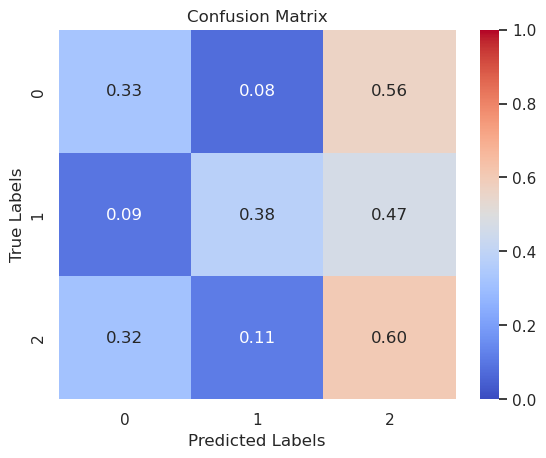

In [64]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
validate_model(logistic)

#### Random Forest

Accuracy: 0.5559440559440559
AUC: 0.7175994221867468
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.56        95
           1       0.54      0.64      0.59        90
           2       0.58      0.46      0.51       101

    accuracy                           0.56       286
   macro avg       0.56      0.56      0.55       286
weighted avg       0.56      0.56      0.55       286



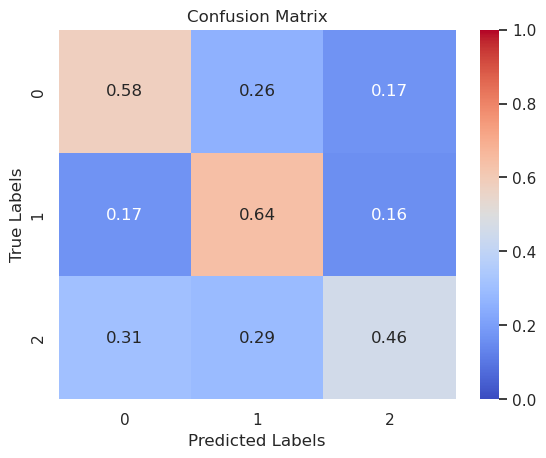

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
validate_model(rf)

#### CatBoost


Accuracy: 0.541958041958042
AUC: 0.7129435569572055
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54        95
           1       0.57      0.68      0.62        90
           2       0.51      0.42      0.46       101

    accuracy                           0.54       286
   macro avg       0.54      0.55      0.54       286
weighted avg       0.54      0.54      0.54       286



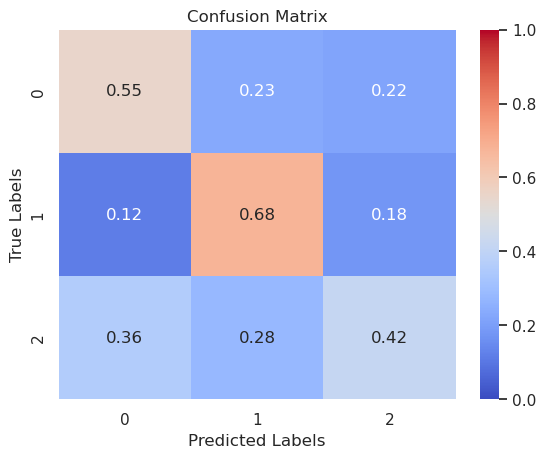

In [66]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=0)
validate_model(cat_model)

#### SVM

Accuracy: 0.42657342657342656
AUC: 0.5155936460286087
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.26      0.36        95
           1       0.67      0.11      0.19        90
           2       0.38      0.86      0.53       101

    accuracy                           0.43       286
   macro avg       0.55      0.41      0.36       286
weighted avg       0.54      0.43      0.37       286



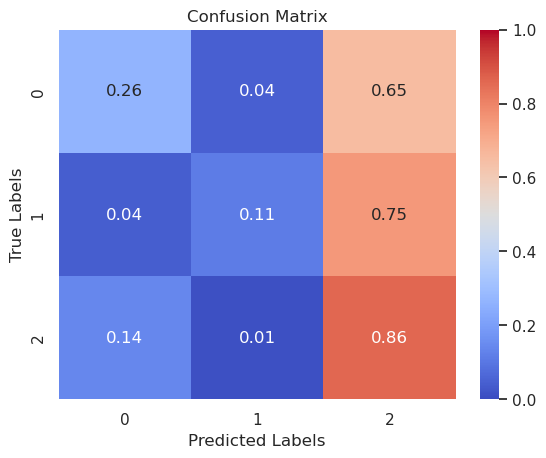

In [67]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=0)
validate_model(svm)

In [68]:
X

,delta,theta,alpha,beta,gamma,channel
0,1091.857986,783.759772,341.420415,48.291324,6.534203,0
1,136400.070619,56545.189988,2759.389246,286.983250,56.889859,4
2,158637.854123,66325.850662,3504.995607,352.707976,69.189197,2
3,1007.744603,709.108100,299.426408,43.433098,5.978930,6
4,1301.209756,831.681041,299.435698,41.298360,5.166203,12
...,...,...,...,...,...,...
1423,20.129042,17.800463,14.956849,12.693690,3.424686,13
1424,6.080685,4.530973,3.160428,2.245390,0.540924,7
1425,28.987517,18.049185,8.888321,6.363966,1.972518,3
1426,16.926464,12.932524,9.209907,8.416145,2.708767,5
